In [318]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt

In [319]:
iris = np.genfromtxt('iris_1D_2c.csv',delimiter = ',', skip_header = 1)

In [320]:
display("data",iris)
display("data shape",iris.shape)

'data'

array([[1.4, 0. ],
       [1.3, 0. ],
       [1.5, 0. ],
       [4.5, 1. ],
       [4.1, 1. ],
       [4.6, 1. ]])

'data shape'

(6, 2)

## Splitting into X and y

In [321]:
X = iris[:,0:1]
y = iris[:,1].astype(int)

In [322]:
X

array([[1.4],
       [1.3],
       [1.5],
       [4.5],
       [4.1],
       [4.6]])

In [323]:
y

array([0, 0, 0, 1, 1, 1])

# Visualize X and y 

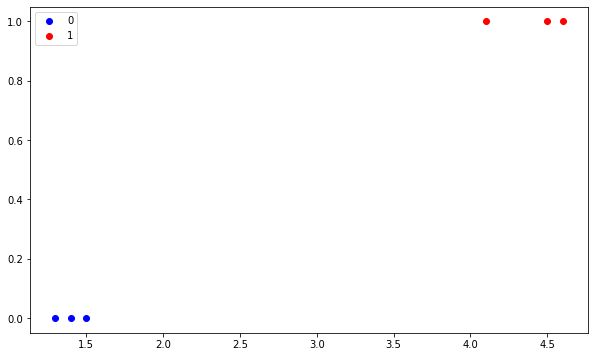

In [324]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()

data normalization

In [325]:

min = np.min(X)
max = np.max(X)

X = (X - min)/(max - min)
X

array([[0.03030303],
       [0.        ],
       [0.06060606],
       [0.96969697],
       [0.84848485],
       [1.        ]])

In [326]:
y.dtype

dtype('int64')

# Setting theta and adding bias

In [327]:
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept,X), axis = 1)
X

array([[1.        , 0.03030303],
       [1.        , 0.        ],
       [1.        , 0.06060606],
       [1.        , 0.96969697],
       [1.        , 0.84848485],
       [1.        , 1.        ]])

In [328]:
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

In [329]:
X_shuffle = X[inds]
y_shuffle = y[inds]

In [340]:
X_shuffle = X_shuffle.T

In [331]:
y_shuffle

array([0, 1, 0, 0, 1, 1])

In [332]:
n_samples = X_shuffle.shape[1]
n_samples

6

## Setting up functions

In [333]:
def softmax_regression(z) : # define the softmax regression 
  z_exp = np.exp(z)
  partition = np.sum(z_exp,keepdims = True, axis = 0) # axis = 0 on rows of columns
  softmax_function = z_exp/partition # probability = y_hat
  return softmax_function
#softmax_function = softmax_regression(z)
def predict(z) : # compute output and convert to probabiltity with softmax function 
  probs = softmax_regression(z) # activation function
  return probs 
# compute loss function 
def loss_function(y,n_samples) : # cross_entropy
    #probs = softmax_regression(z)
    corect_logpros = -np.log(probs[y,range(n_samples)]) # select label as well as real label
    loss = np.sum(corect_logpros)/y.size # 1 sample stoasctic
    return loss
# derivative of loss function
def compute_loss(X,y) :
  dscroes = probs
  dscroes[y,range(n_samples)] -= 1 # if else
  dtheta = np.dot(X,dscroes.T)
  return dtheta
# update weights
def update_weights(dtheta,theta,n):
  theta += -n * dtheta
  return theta

## init parameters and hyperparameters

In [334]:
n = 0.01 # learning rate
losses = []
accs = []
#theta = np.array([0.01,-0.4]) 
epoch_max = 1000 # training with 1000 interation
D = 1 # dimensionality

K = 2# number of classes
# initialize parameters randomly
theta = np.random.randn(D+1,K)
theta.shape

(2, 2)

In [338]:
for epoch in range(epoch_max) :
  #Xi = X_shuffle
  #print("X_shuffle",X_shuffle)
  yi = y_shuffle.astype(int)
  #print("Xi",Xi)
  #print("yi",yi.shape)
  z = np.dot(theta.T,X_shuffle)
  #print("Z",z)
  probs = predict(z)
  # forward
  #print("predict values probs",probs)
  loss = loss_function(yi,n_samples)   ##########
  losses.append(loss) 
  print("loss",losses)
  dtheta = compute_loss(X_shuffle,yi)
  #print("Derivative loss",dtheta)
  # update weights backward
  theta = update_weights(dtheta,theta,n)
  print("Theta",theta)

Output hidden; open in https://colab.research.google.com to view.

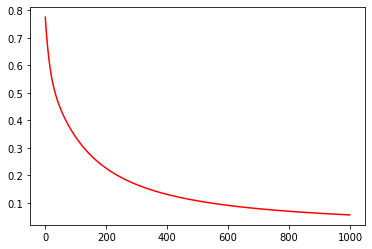

In [336]:
axis = range(len(losses))
plt.plot(losses,color = 'r')
plt.show()

In [337]:
predicted_class = np.argmax(z, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.67
